**HEART DISEASE PREDICTION**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('heart.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

**DATA DESCRIPTION**



•age: The person's age in years

•    sex: The person's sex (1 = male, 0 = female)
•    cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

•    trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

•    chol: The person's cholesterol measurement in mg/dl

•    fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

•    restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

•    thalach: The person's maximum heart rate achieved

•    exang: Exercise induced angina (1 = yes; 0 = no)

•    oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

•    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

•    ca: The number of major vessels (0-3)

•    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

•    target: Heart disease (0 = no, 1 = yes)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**FEATURE SELECTION**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
#input columns
X = data.iloc[:,0:13]  
#target column 
y = data.iloc[:,-1]    
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  650.008493
9    oldpeak  253.653461
2         cp  217.823922
11        ca  210.625919
8      exang  130.470927
4       chol  110.723364
0        age   81.425368
3   trestbps   45.974069
10     slope   33.673948
1        sex   24.373650
12      thal   19.373465
6    restecg    9.739343


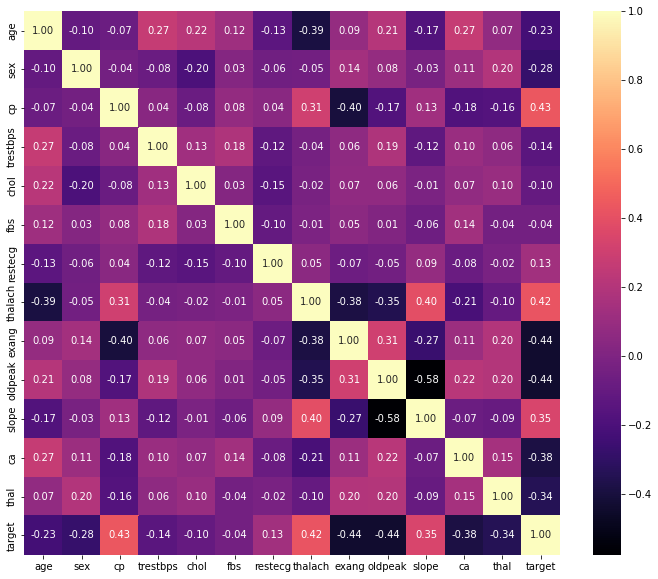

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [ ]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [ ]:
df.drop("slope",axis=1,inplace=True)

In [ ]:
df.drop("thal",axis=1,inplace=True)

In [ ]:
df.drop("restecg",axis=1,inplace=True)

In [ ]:
df.drop("trestbps",axis=1,inplace=True)

In [ ]:
df.head()

,age,sex,cp,chol,fbs,thalach,exang,oldpeak,ca,target
0,52,1,0,212,0,168,0,1.0,2,0
1,53,1,0,203,1,155,1,3.1,0,0
2,70,1,0,174,0,125,1,2.6,0,0
3,61,1,0,203,0,161,0,0.0,1,0
4,62,0,0,294,1,106,0,1.9,3,0


In [ ]:
x = df.iloc[:,0:9] # Features
y = df.iloc[:,9] # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1])

f1 Score:  0.9295774647887323
precision:  0.9166666666666666
recall:  0.9428571428571428
Accuracy Score:  0.926829268292683


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


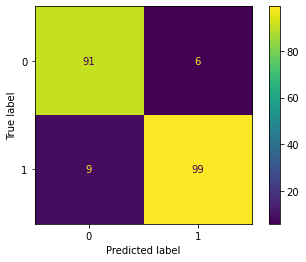

In [ ]:
from sklearn import metrics
er=metrics.accuracy_score(y_pred,y_test)
f1=metrics.f1_score(y_pred,y_test)
print('f1 Score: ',f1)
print('precision: ',metrics.precision_score(y_pred,y_test))
print('recall: ',metrics.recall_score(y_pred,y_test))
print('Accuracy Score: ',er)
metrics.plot_confusion_matrix(classifier,X_test,y_test,display_labels=['0','1'])

In [ ]:
df2=pd.DataFrame(y_pred,columns=['predicted_values'])
df2.head()

,predicted_values
0,0
1,1
2,0
3,1
4,0


In [ ]:
test_arr=np.array(y_test)
test_arr

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1])

In [ ]:
df3=pd.DataFrame(test_arr,columns=['Actual_values'])
df3.head()

,Actual_values
0,0
1,1
2,0
3,1
4,0


In [ ]:
df2=pd.concat([df2,df3],axis=1)
df2.head()

,predicted_values,Actual_values
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


In [ ]:
print("correct predictions:")
for j in range(len(df2)):
  if(df2['predicted_values'].loc[j]==df2['Actual_values'].loc[j]):
    print(df2['predicted_values'].loc[j]," ",df2['Actual_values'].loc[j]," ",j)

correct predictions:
0   0   0
1   1   1
0   0   2
1   1   3
0   0   4
1   1   5
0   0   6
1   1   7
0   0   8
0   0   9
0   0   10
1   1   11
0   0   12
0   0   13
1   1   14
0   0   15
1   1   16
1   1   17
0   0   18
1   1   19
0   0   20
1   1   21
1   1   22
0   0   23
1   1   24
1   1   25
1   1   27
0   0   28
1   1   29
1   1   30
0   0   32
0   0   33
1   1   34
0   0   35
0   0   36
1   1   37
1   1   39
0   0   41
0   0   42
1   1   43
0   0   44
1   1   45
1   1   46
1   1   47
1   1   48
0   0   49
1   1   50
1   1   52
0   0   53
1   1   54
1   1   55
1   1   56
0   0   57
1   1   58
1   1   59
1   1   60
0   0   61
1   1   62
1   1   63
0   0   64
0   0   65
0   0   66
0   0   67
0   0   68
1   1   69
1   1   70
0   0   71
1   1   72
0   0   73
0   0   74
0   0   75
1   1   76
1   1   77
1   1   78
0   0   79
1   1   80
1   1   81
0   0   82
0   0   83
1   1   84
1   1   85
1   1   86
0   0   87
1   1   88
1   1   89
0   0   90
1   1   91
1   1   92
1   1   93
0   0   94

In [ ]:
print("Incorrect predictions:")
for j in range(len(df2)):
  if(df2['predicted_values'].loc[j]!=df2['Actual_values'].loc[j]):
    print(df2['predicted_values'].loc[j]," ",df2['Actual_values'].loc[j]," ",j)